<a href="https://colab.research.google.com/github/Anan-punathil/Capstone-Entri-ML-classification/blob/main/Capstone_Entri_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Amazon Customer Behavior Prediction Model**
Name: ANAN P

Organization: Entri Elevate

Date: 16/08/2024


**Introduction to Dataset**

The Amazon Customer Behavior Survey dataset provides detailed insights into customer experiences and behaviors on the Amazon platform. It includes various demographic, behavioral, and transactional data to help understand and predict customer satisfaction levels. This dataset is vital for assessing customer satisfaction, which is critical for improving customer experiences and enhancing service quality.

**Objective**

The primary objective of this project is to develop a predictive model that accurately forecasts customer satisfaction based on their behavior and interaction with the Amazon platform. This model will help Amazon and similar e-commerce platforms identify areas of improvement and make data-driven decisions to enhance customer satisfaction.

**Data Description**

*  The dataset comprises several features that may influence customer satisfaction, including:


**Customer Information**

  * Age: The customer’s age in years.

  * Gender: The customer’s gender identity.

  * Education Level: The highest level of education attained by the customer.

* Employment Status: The customer’s current employment status.

* Annual Income: The customer’s annual income.

* City: The city where the customer resides.

* State: The state where the customer resides.

* Country: The country where the customer resides.

**Shopping Behavior**

* Purchase Frequency: The frequency of purchases made by the customer.

* Product Categories Purchased: Categories of products frequently bought by the customer.

* Average Order Value: The average value of a single order made by the customer.

**Customer Feedback**

* Customer Reviews Importance: The importance the customer places on reviews when making purchasing decisions.

* Product Rating Accuracy: How accurately the customer believes the product ratings reflect the product quality.

* Return Rate: The frequency at which the customer returns purchased items.

**Shopping Satisfaction** (Target Variable)

* Shopping Satisfaction: A numerical rating or categorical label indicating the customer’s overall satisfaction with their shopping experience.

**Goals**

*Data Exploration and Preprocessing:*


* Perform exploratory data analysis (EDA) to identify patterns, trends, and anomalies in customer behavior.

* Clean the dataset by handling missing values, outliers, and inconsistencies.

* Transform the data by encoding categorical variables, scaling numerical variables, and creating new features where necessary.

**Feature Selection:**

* Identify the most relevant features that significantly impact shopping satisfaction prediction.

* Reduce dimensionality to enhance model performance and interpretability.

**Model Development:**

* Train various machine learning models such as logistic regression, decision trees, random forests, gradient boosting, and SVM.

* Evaluate the models using appropriate metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc.

* Select the best-performing model based on evaluation metrics and validation techniques.

**Model Interpretation:**

* Interpret the model’s predictions to understand the factors contributing to customer satisfaction.

* Use techniques like feature importance to provide insights into the model’s decision-making process.

**Deployment:**

* Develop a user-friendly interface or dashboard for stakeholders to input new data and receive customer satisfaction predictions.

* Ensure the model is scalable and can handle real-time data inputs for continuous assessment.

**Documentation and Reporting:**

* Document the entire process, including data exploration, preprocessing steps, model development, and evaluation.

* Prepare a comprehensive report that highlights key findings, model performance, and actionable insights for stakeholders.

**Expected Outcomes**

* A robust predictive model that accurately assesses customer satisfaction.

* Improved decision-making capabilities for e-commerce platforms regarding customer experience management.

* Enhanced understanding of the factors influencing customer satisfaction and potential areas for improvement.

**Challenges**

* Ensuring data quality and completeness for accurate model training.

* Balancing model complexity and interpretability to provide meaningful insights.

* Addressing potential biases in the data to avoid unfair satisfaction assessments.

**Conclusion**

* The successful completion of this project will provide a valuable tool for e-commerce platforms like Amazon to manage customer satisfaction effectively. It will contribute to more informed decision-making processes, ultimately leading to improved customer experiences and increased customer loyalty.

**Data Source**

You can use easily download the dataset using this link

In [1]:
!wget https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data?select=Amazon+Customer+Behavior+Survey.csv

--2024-10-30 08:41:05--  https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data?select=Amazon+Customer+Behavior+Survey.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data?select=Amazon+Customer+Behavior+Survey.csv’

data?select=Amazon+     [ <=>                ]  11.73K  --.-KB/s    in 0.02s   

2024-10-30 08:41:05 (689 KB/s) - ‘data?select=Amazon+Customer+Behavior+Survey.csv’ saved [12012]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv('/content/Amazon Customer Behavior Survey (1) (1).csv')
print(df.describe())


              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency   Rating_Accuracy   \
count                              602.000000        602.000000   
mean                                 2.699336          2.672757   
std                                  1.042028          0.899744   
min                                  1.000000          1.000000   
25%                                  2.000000          2.000000   
50%                                  3.000000          3.000000   
75%                                  3.000000          3.000000   
max          

In [4]:
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [5]:
print(df.head())

                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5:28:06 PM GMT+5:30   22             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                           

In [6]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [7]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df["Shopping_Satisfaction"].value_counts()

,count
Shopping_Satisfaction,
3,209
2,194
1,115
4,67
5,17


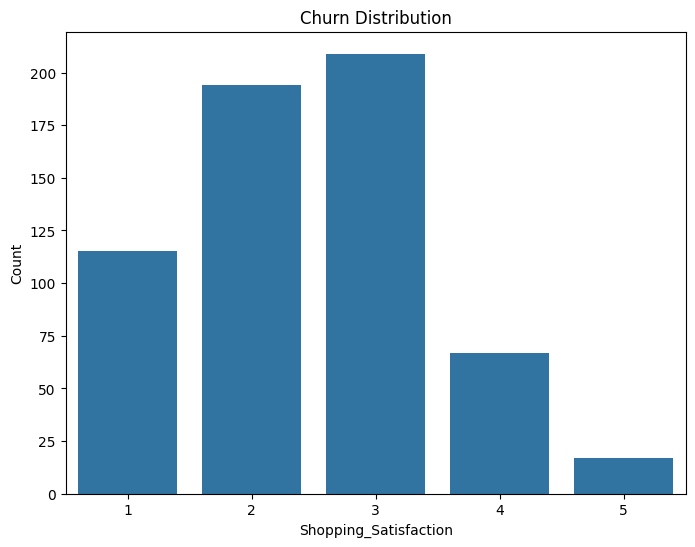

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Shopping_Satisfaction",data=df)
plt.title('Churn Distribution')
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Count')
plt.show()

In [10]:
# Define satisfaction classes based on satisfaction score
def classify_satisfaction(score):
    if score <= 2:
        return 'Low'
    elif 3 == score :
        return 'Medium'
    else :
        return 'High'

# Apply classification
df['satisfaction_class'] = df['Shopping_Satisfaction'].apply(classify_satisfaction)


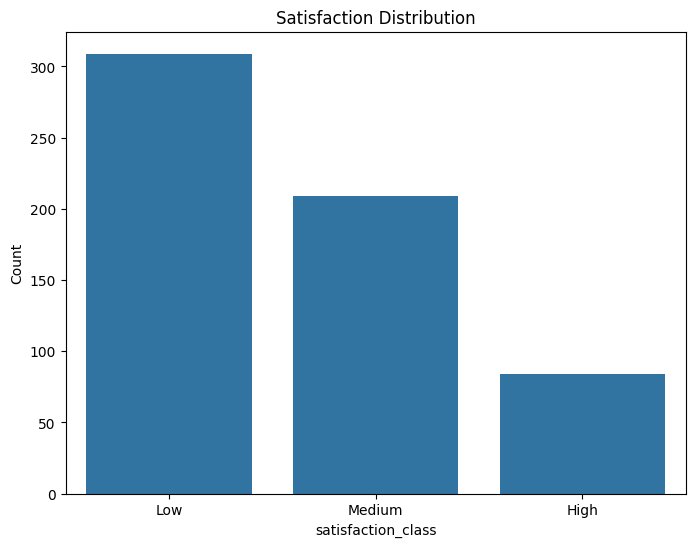

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="satisfaction_class",data=df)
plt.title('Satisfaction Distribution')
plt.xlabel('satisfaction_class')
plt.ylabel('Count')
plt.show()

**Addressing Imbalanced Data**

The data is imbalanced, consider techniques like:

Oversampling: Increasing the number of instances in the minority class.

Undersampling: Reducing the number of instances in the majority class.

Class weighting: Adjusting the weights of different classes during model training.

Ensemble methods: Combining multiple models to improve performance.

Remember: The best approach depends on the specific characteristics of your dataset and the problem you're trying to solve.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [13]:
df.describe()


,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
df["satisfaction_class"].value_counts()


,count
satisfaction_class,
Low,309
Medium,209
High,84


Features and Target variable

In [15]:
# List the features
features = df.columns.tolist()
features.remove('satisfaction_class')
print("Features in the dataset:")
for feature in features:
    print(feature)

# Identify the target variable
target = 'satisfaction_class'
print("\nTarget variable:")
print(target)

Features in the dataset:
Timestamp
age
Gender
Purchase_Frequency
Purchase_Categories
Personalized_Recommendation_Frequency
Browsing_Frequency
Product_Search_Method
Search_Result_Exploration
Customer_Reviews_Importance
Add_to_Cart_Browsing
Cart_Completion_Frequency
Cart_Abandonment_Factors
Saveforlater_Frequency
Review_Left
Review_Reliability
Review_Helpfulness
Personalized_Recommendation_Frequency 
Recommendation_Helpfulness
Rating_Accuracy 
Shopping_Satisfaction
Service_Appreciation
Improvement_Areas

Target variable:
satisfaction_class


In [16]:
print(df.shape)

(602, 24)


In [17]:
print(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'satisfaction_class'],
      dtype='object')


checking for duplicates

In [18]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Timestamp, age, Gender, Purchase_Frequency, Purchase_Categories, Personalized_Recommendation_Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency , Recommendation_Helpfulness, Rating_Accuracy , Shopping_Satisfaction, Service_Appreciation, Improvement_Areas, satisfaction_class]
Index: []

[0 rows x 24 columns]


There are no duplicate rows in our DataFrame according to the criteria used by the data.duplicated() method. This indicates that every row in our DataFrame is unique.

# **Data preprocessing**


handling missing

In [19]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [20]:

# Replace with 'mode' to fill with the most frequent value
df['Product_Search_Method'].fillna(df['Product_Search_Method'].mode()[0], inplace=True)



In [21]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,0
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [22]:
df.nunique()

,0
Timestamp,601
age,50
Gender,4
Purchase_Frequency,5
Purchase_Categories,29
Personalized_Recommendation_Frequency,3
Browsing_Frequency,4
Product_Search_Method,4
Search_Result_Exploration,2
Customer_Reviews_Importance,5



We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.

Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not

In [23]:
df["satisfaction_class"].head(10)

,satisfaction_class
0,Low
1,Low
2,Medium
3,High
4,Low
5,Low
6,Medium
7,Medium
8,Low
9,High


#detecting outliers#

In [24]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

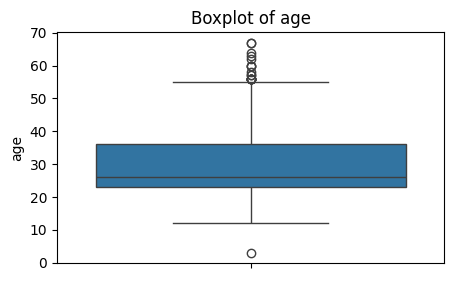

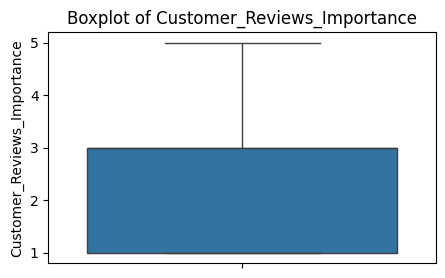

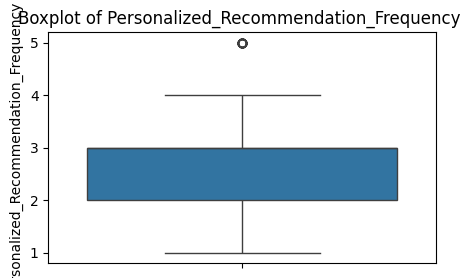

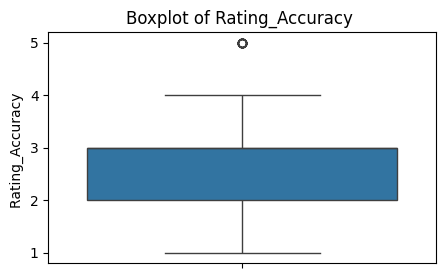

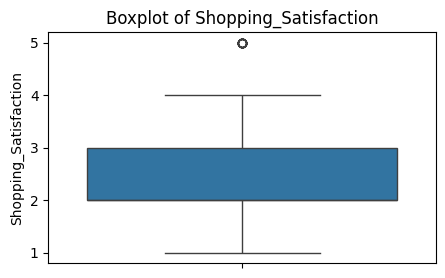

In [25]:
for column in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

**handling outlier**(capping)

In [26]:
# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection, but exclude 'Rating' columns
for feature in numerical_features:
    if 'Rating' not in feature:  # Exclude 'Rating' columns
        lower_bound = Q1[feature] - 1.5 * IQR[feature]
        upper_bound = Q3[feature] + 1.5 * IQR[feature]

        # Cap outliers for the current feature
        df[feature] = np.clip(df[feature], lower_bound, upper_bound)

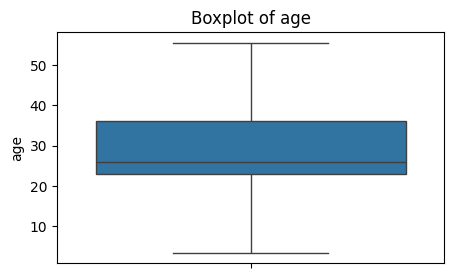

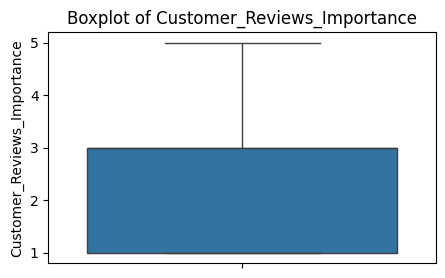

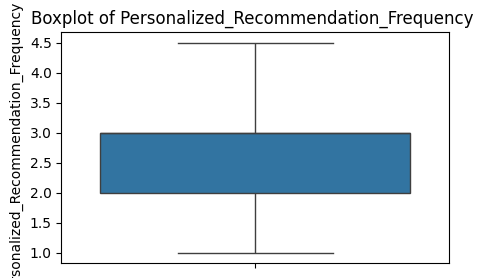

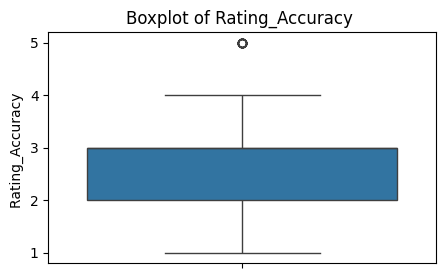

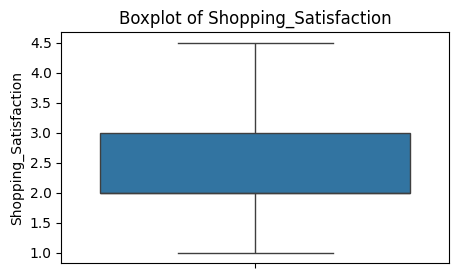

In [27]:
for column in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [28]:
df.shape

(602, 24)

**Exploratory Data Analysis(EDA)**

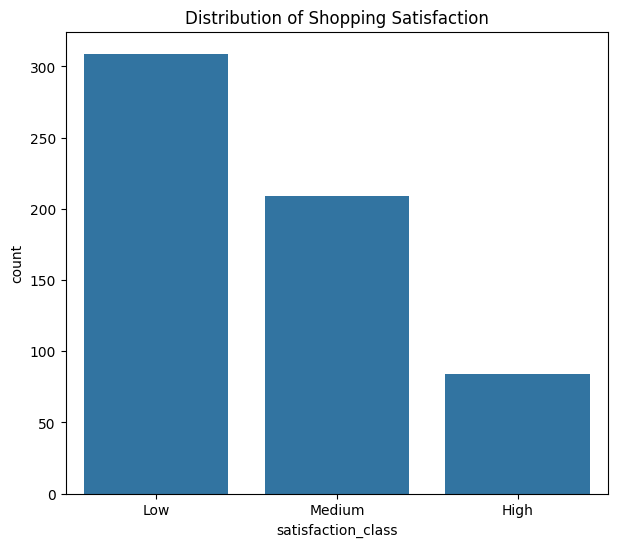

In [29]:
# Distribution of shopping satisfaction
plt.figure(figsize=(7, 6))
sns.countplot(x='satisfaction_class', data=df)
plt.title('Distribution of Shopping Satisfaction')
plt.show()


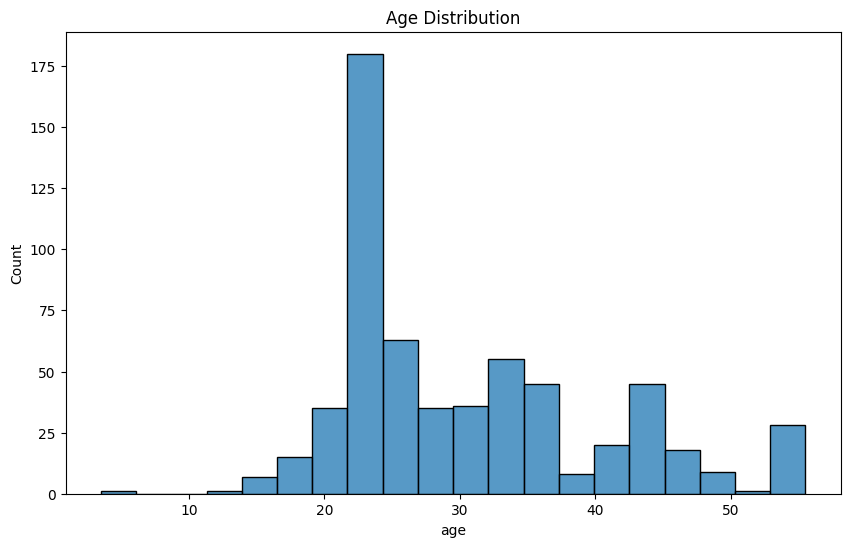

In [30]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()


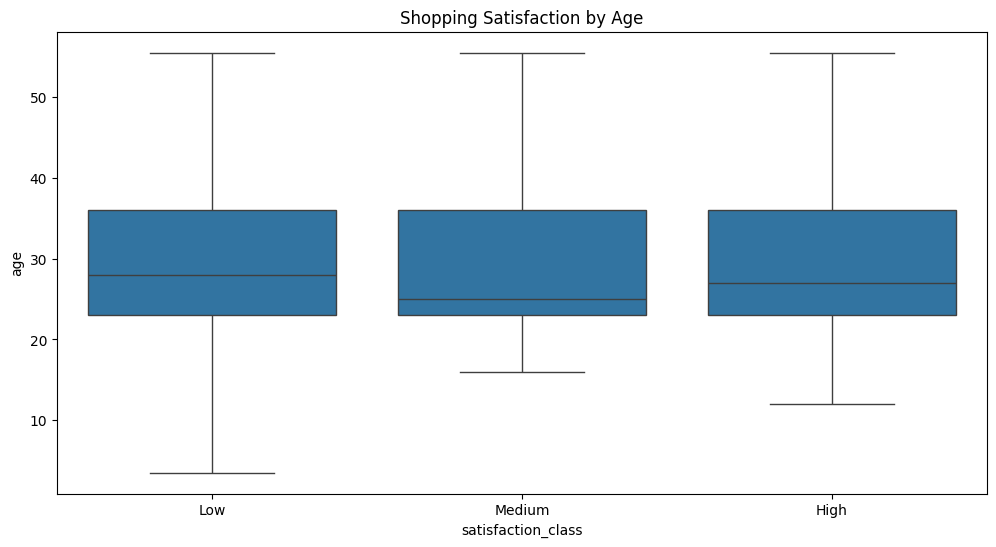

In [31]:
# Boxplot of shopping satisfaction by age
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction_class', y='age', data=df)
plt.title('Shopping Satisfaction by Age')
plt.show()


pairplot for numerical features

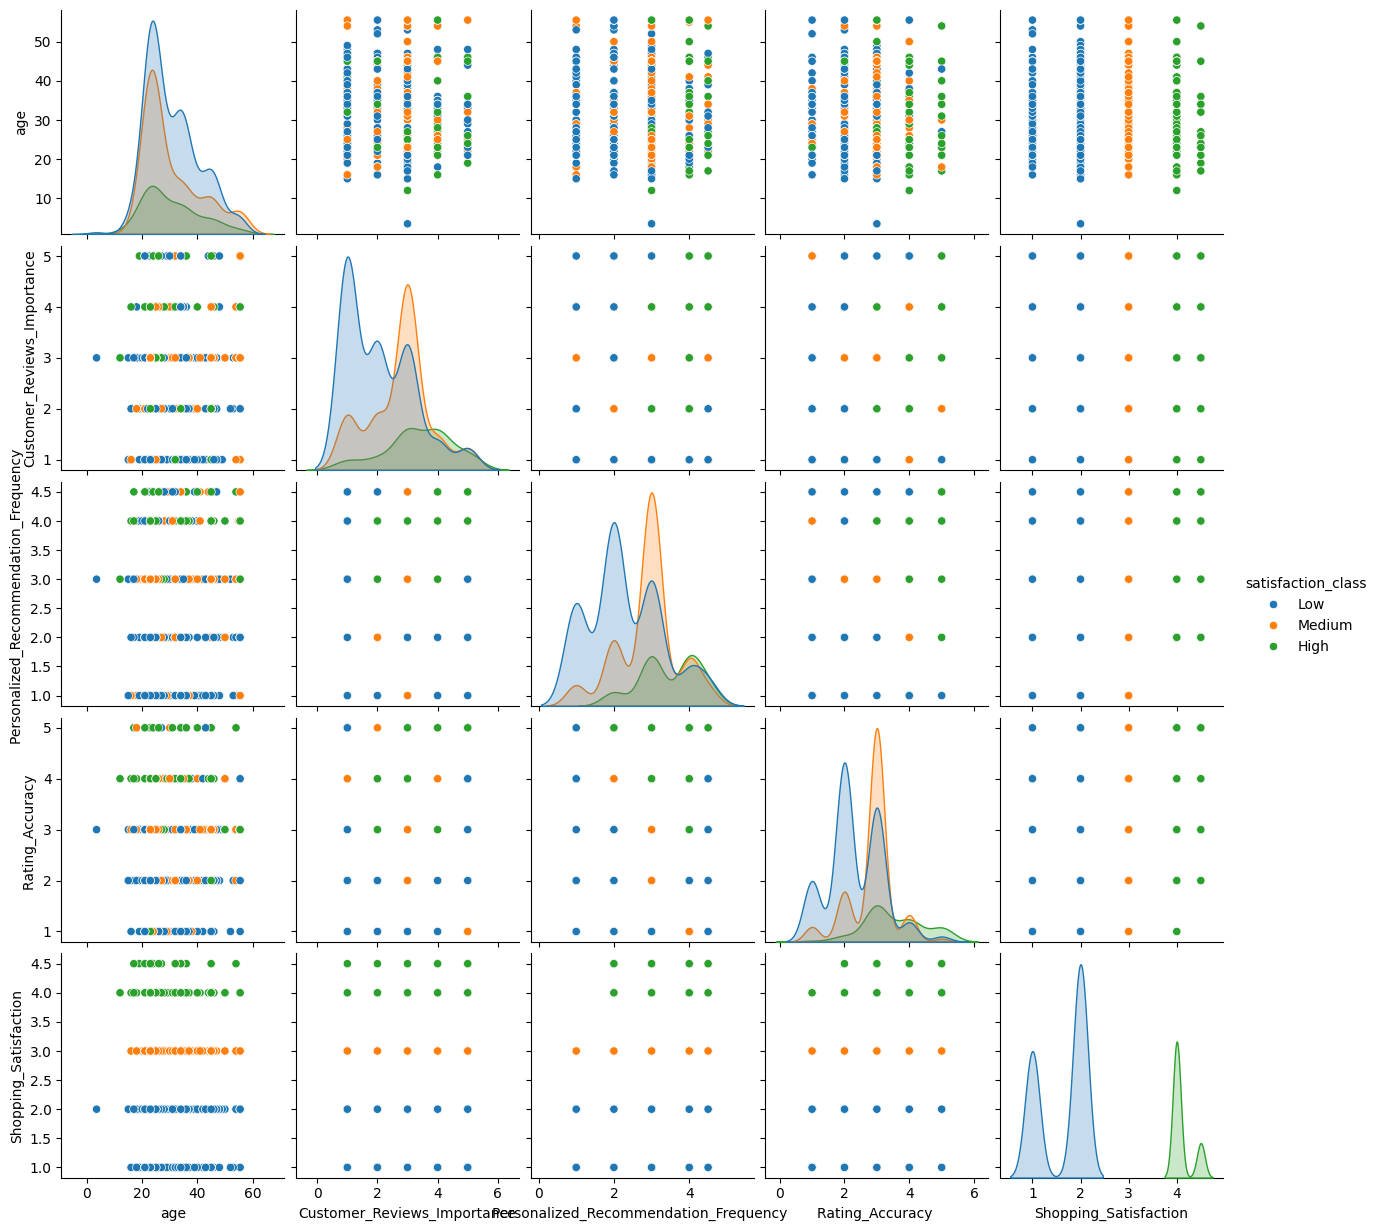

In [32]:
# Identifying numerical features in the DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a pairplot with numerical features
sns.pairplot(df, vars=numerical_features, hue='satisfaction_class')

plt.show()


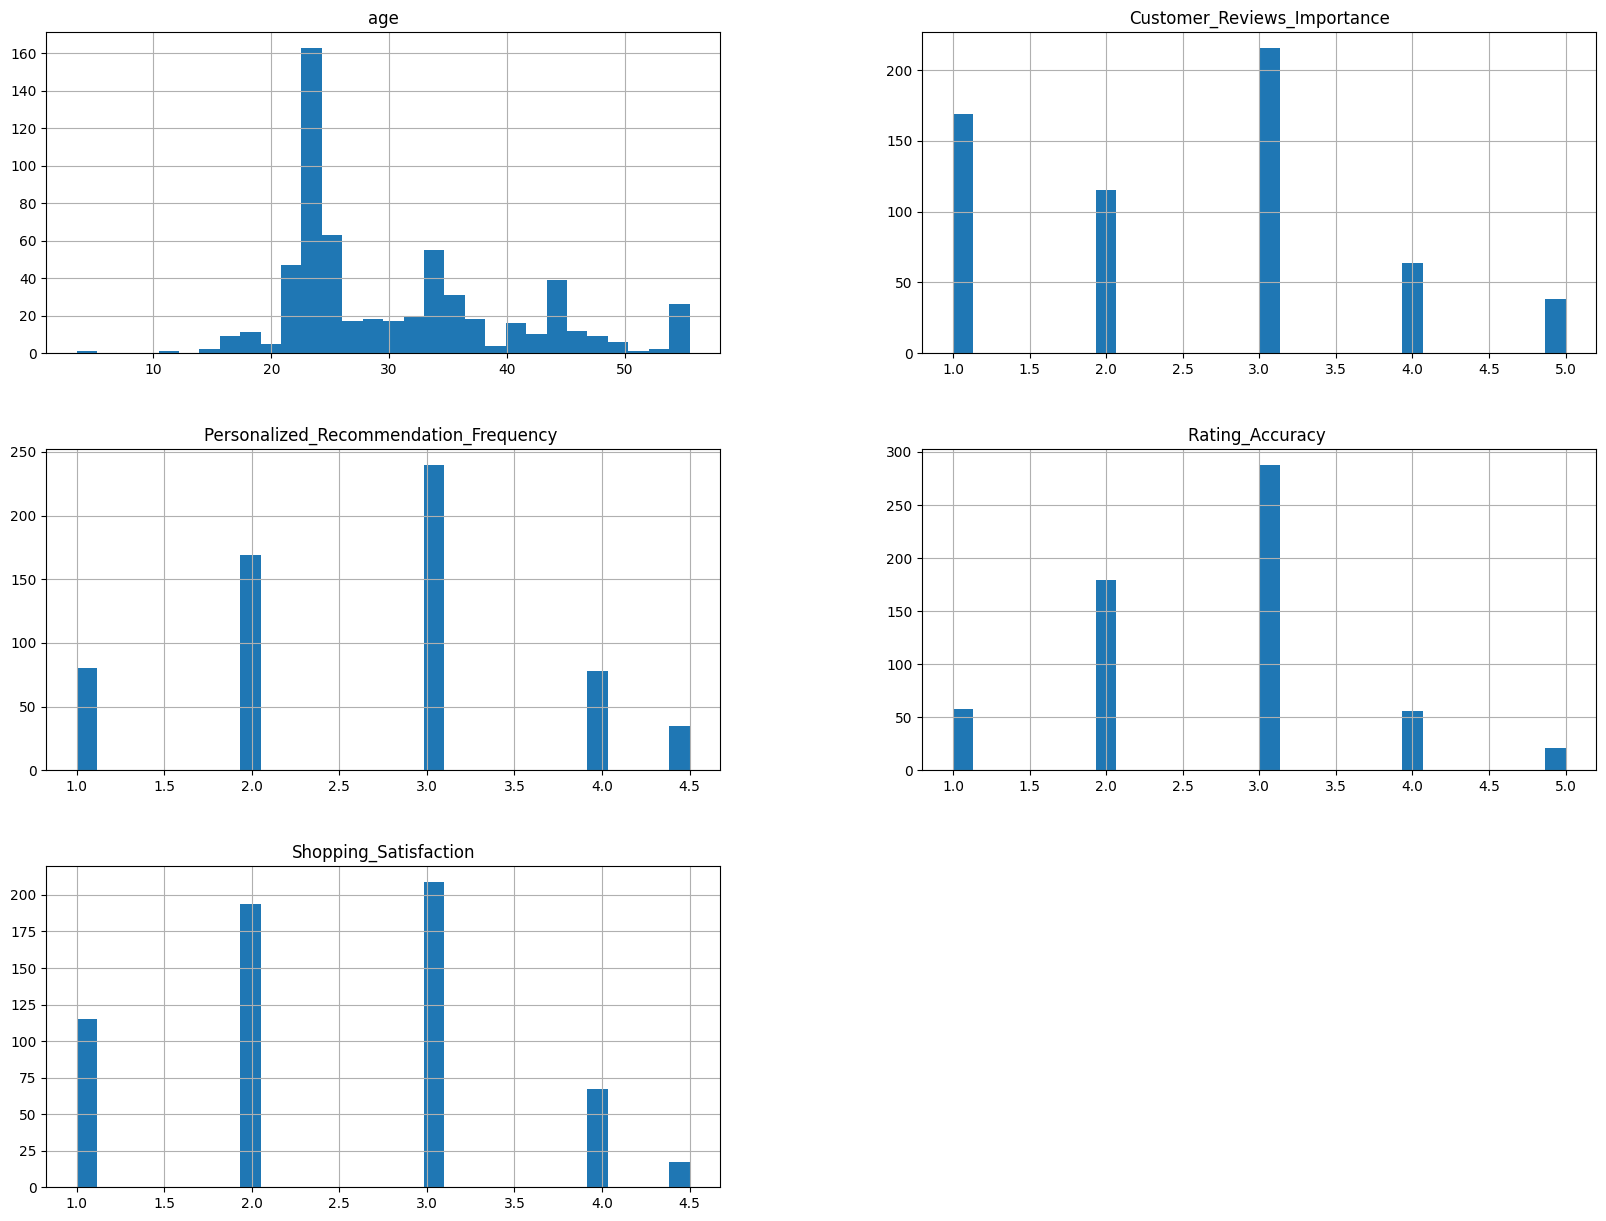

In [33]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

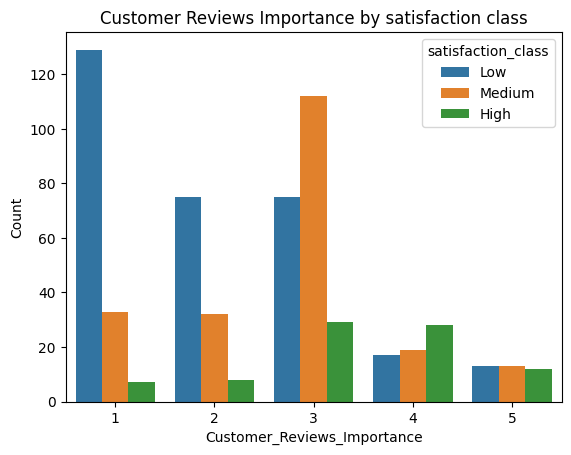

In [34]:
sns.countplot(x='Customer_Reviews_Importance', hue='satisfaction_class', data=df)
plt.title('Customer Reviews Importance by satisfaction class')
plt.xlabel('Customer_Reviews_Importance')
plt.ylabel('Count')
plt.show()

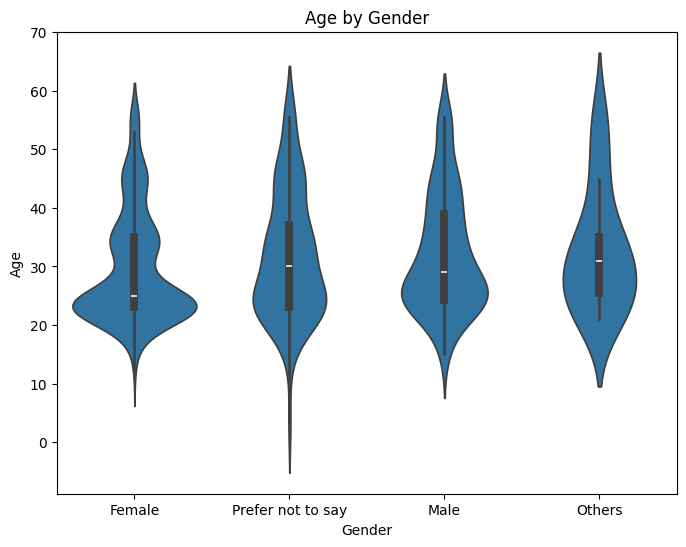

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='age', data=df)
plt.title('Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

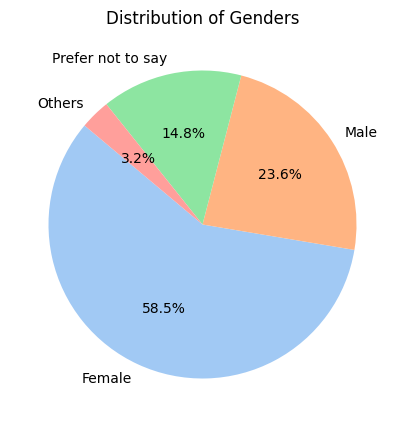

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Distribution of Genders')

# Display the pie chart
plt.show()

# **Feature engineering**


In [37]:
df['satisfaction_class'].value_counts()

,count
satisfaction_class,
Low,309
Medium,209
High,84


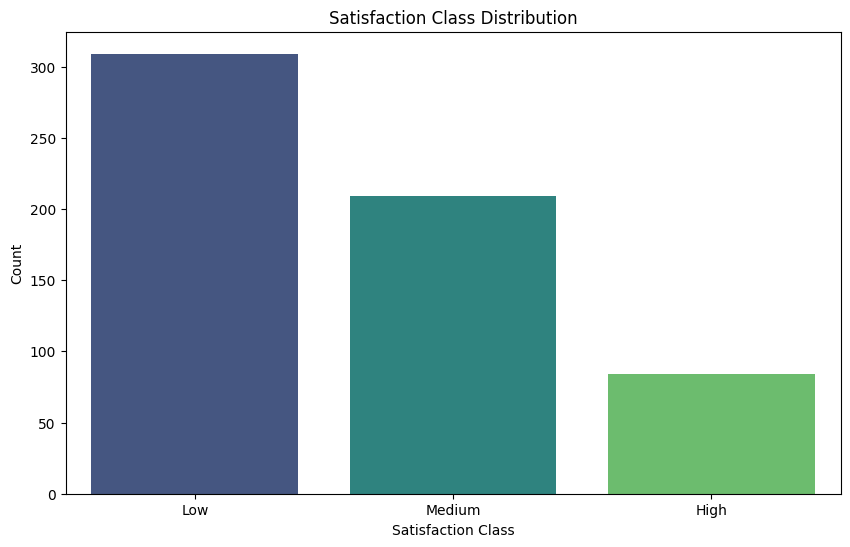

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction_class', data=df, palette='viridis')
plt.title('Satisfaction Class Distribution')
plt.xlabel('Satisfaction Class')
plt.ylabel('Count')
plt.show()


**Ordinal Encoding**

In [39]:
numerical_features

['age',
 'Customer_Reviews_Importance',
 'Personalized_Recommendation_Frequency ',
 'Rating_Accuracy ',
 'Shopping_Satisfaction']

In [40]:
categorical_features

['Timestamp',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Improvement_Areas',
 'satisfaction_class']

In [41]:
# List of columns to drop
columns_to_drop = ['Improvement_Areas', 'Product_Search_Method', 'Add_to_Cart_Browsing', 'Saveforlater_Frequency', 'Search_Result_Exploration']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Verify if the columns are dropped
print(df.head())  # Displays the first few rows of the updated DataFrame


                        Timestamp   age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30  23.0             Female   
1  2023/06/04 2:30:44 PM GMT+5:30  23.0             Female   
2  2023/06/04 5:04:56 PM GMT+5:30  24.0  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30  24.0             Female   
4  2023/06/04 5:28:06 PM GMT+5:30  22.0             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                     

In [42]:
# Assuming you already have your dataset loaded in df

# Import necessary library
from sklearn.preprocessing import OrdinalEncoder

# Define the OrdinalEncoder with the desired order, matching the case in your data
oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']]) # Changed categories to match case

# Fit and transform the 'satisfaction_class' column in your existing dataset
df['satisfaction_class'] = oe.fit_transform(df[['satisfaction_class']])

# Verify the changes
print(df.head())  # This will display the first few rows to ensure the column is updated

                        Timestamp   age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30  23.0             Female   
1  2023/06/04 2:30:44 PM GMT+5:30  23.0             Female   
2  2023/06/04 5:04:56 PM GMT+5:30  24.0  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30  24.0             Female   
4  2023/06/04 5:28:06 PM GMT+5:30  22.0             Female   

       Purchase_Frequency                                Purchase_Categories  \
0       Few times a month                           Beauty and Personal Care   
1            Once a month                               Clothing and Fashion   
2       Few times a month    Groceries and Gourmet Food;Clothing and Fashion   
3            Once a month  Beauty and Personal Care;Clothing and Fashion;...   
4  Less than once a month      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                     

*Label Encoding*

In [43]:
# Import necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding on 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

# Check the transformed values
print(df[['Gender']].head())


   Gender
0       0
1       0
2       3
3       0
4       0


*One-Hot Encoding*

In [44]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity if needed

# Apply One-Hot Encoding and convert to DataFrame
encoded_service_appreciation = pd.DataFrame(ohe.fit_transform(df[['Service_Appreciation']]),
                                            columns=ohe.get_feature_names_out(['Service_Appreciation']))

# Reset index of the new DataFrame for concatenation
encoded_service_appreciation.index = df.index

# Drop the original 'Service_Appreciation' column
df = df.drop('Service_Appreciation', axis=1)

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df, encoded_service_appreciation], axis=1)

# Display the updated DataFrame
print(df.head())


                        Timestamp   age  Gender      Purchase_Frequency  \
0  2023/06/04 1:28:19 PM GMT+5:30  23.0       0       Few times a month   
1  2023/06/04 2:30:44 PM GMT+5:30  23.0       0            Once a month   
2  2023/06/04 5:04:56 PM GMT+5:30  24.0       3       Few times a month   
3  2023/06/04 5:13:00 PM GMT+5:30  24.0       0            Once a month   
4  2023/06/04 5:28:06 PM GMT+5:30  22.0       0  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                         

In [45]:
# Import necessary library
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Columns to One-Hot Encode
columns_to_encode = ['Purchase_Categories', 'Browsing_Frequency',
                     'Cart_Abandonment_Factors', 'Review_Left']

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Updated to sparse_output=False

# Apply One-Hot Encoding and convert to DataFrame
encoded_columns = pd.DataFrame(ohe.fit_transform(df[columns_to_encode]),
                               columns=ohe.get_feature_names_out(columns_to_encode))

# Reset the index for the concatenation
encoded_columns.index = df.index

# Drop the original columns and concatenate the one-hot encoded columns back to the dataset
df = df.drop(columns=columns_to_encode, axis=1)
df = pd.concat([df, encoded_columns], axis=1)

# Display the updated DataFrame
print(df.head())


                        Timestamp   age  Gender      Purchase_Frequency  \
0  2023/06/04 1:28:19 PM GMT+5:30  23.0       0       Few times a month   
1  2023/06/04 2:30:44 PM GMT+5:30  23.0       0            Once a month   
2  2023/06/04 5:04:56 PM GMT+5:30  24.0       3       Few times a month   
3  2023/06/04 5:13:00 PM GMT+5:30  24.0       0            Once a month   
4  2023/06/04 5:28:06 PM GMT+5:30  22.0       0  Less than once a month   

  Personalized_Recommendation_Frequency  Customer_Reviews_Importance  \
0                                   Yes                            1   
1                                   Yes                            1   
2                                    No                            2   
3                             Sometimes                            5   
4                                   Yes                            1   

  Cart_Completion_Frequency Review_Reliability Review_Helpfulness  \
0                 Sometimes       Occasionally 

*Ordinal Encoding*

In [46]:
# Check unique values in each column before encoding
print(df['Purchase_Frequency'].unique())
print(df['Personalized_Recommendation_Frequency'].unique())
print(df['Cart_Completion_Frequency'].unique())


['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']
['Yes' 'No' 'Sometimes']
['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


In [47]:
# Define ordinal columns with their expected order of values
ordinal_columns = {
    'Purchase_Frequency': ['Never', 'Less than once a month', 'Once a month', 'Few times a month', 'Once a week', 'Multiple times a week'],
    'Personalized_Recommendation_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Cart_Completion_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
}

# Check unique values for each column in ordinal_columns
for col in ordinal_columns.keys():
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Purchase_Frequency: ['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']
Unique values in Personalized_Recommendation_Frequency: ['Yes' 'No' 'Sometimes']
Unique values in Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


In [48]:
# For binary columns like 'No' and 'Yes'
from sklearn.preprocessing import LabelEncoder

# Assuming 'Column_Name' has 'No' and 'Yes'
le = LabelEncoder()

# Apply label encoding
df['Personalized_Recommendation_Frequency'] = le.fit_transform(df['Personalized_Recommendation_Frequency'])


In [49]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

# Ensure the columns you are encoding are strings
df[list(ordinal_columns.keys())] = df[list(ordinal_columns.keys())].astype(str)

# Check unique values to handle unexpected ones
for col in ordinal_columns.keys():
    print(f"Unique values in {col}: {df[col].unique()}")

# (Optional) Map unexpected numeric values back to expected categories if needed
# Example for 'Personalized_Recommendation_Frequency'
mapping = {'0': 'Never', '1': 'Rarely', '2': 'Sometimes'}  # Adjust according to your data
df['Personalized_Recommendation_Frequency'] = df['Personalized_Recommendation_Frequency'].replace(mapping)

# Define the ordinal categories for each column, including unexpected numeric values as strings
ordinal_columns = {
    'Purchase_Frequency': ['Never','Less than once a month', 'Once a month', 'Few times a month', 'Once a week', 'Multiple times a week','1.0', '2.0', '0.0', '4.0', '3.0'], # Added the unexpected values
    'Personalized_Recommendation_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'Cart_Completion_Frequency': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
}

# Initialize OrdinalEncoder with the categories
oe = OrdinalEncoder(categories=[ordinal_columns[col] for col in ordinal_columns])

# Apply Ordinal Encoding and replace the original columns with the encoded ones
df[list(ordinal_columns.keys())] = oe.fit_transform(df[list(ordinal_columns.keys())])

# Display the updated DataFrame
print(df.head())

Unique values in Purchase_Frequency: ['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']
Unique values in Personalized_Recommendation_Frequency: ['2' '0' '1']
Unique values in Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']
                        Timestamp   age  Gender  Purchase_Frequency  \
0  2023/06/04 1:28:19 PM GMT+5:30  23.0       0                 3.0   
1  2023/06/04 2:30:44 PM GMT+5:30  23.0       0                 2.0   
2  2023/06/04 5:04:56 PM GMT+5:30  24.0       3                 3.0   
3  2023/06/04 5:13:00 PM GMT+5:30  24.0       0                 2.0   
4  2023/06/04 5:28:06 PM GMT+5:30  22.0       0                 1.0   

   Personalized_Recommendation_Frequency  Customer_Reviews_Importance  \
0                                    2.0                            1   
1                                    2.0                            1   
2                                    0.0              

converting date column

In [50]:
# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract only the date part from the Timestamp
df['Timestamp'] = df['Timestamp'].dt.date


In [51]:
# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year, month, and day as separate columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

# Drop the original 'Timestamp' column and other non-numeric columns if necessary
df = df.drop([ 'Timestamp'], axis=1)

In [52]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming df is your DataFrame

# Define the order of categories for ordinal encoding
ordinal_mapping = {
    'Review_Reliability': ['Never', 'Rarely','Occasionally', 'Moderately', 'Heavily'],  # Replace with the actual order in your dataset
    'Review_Helpfulness': ['No', 'Sometimes', 'Yes']  # Replace with the actual order
}

# Create an OrdinalEncoder object with custom categories
oe = OrdinalEncoder(categories=[ordinal_mapping['Review_Reliability'], ordinal_mapping['Review_Helpfulness']])

# Apply Ordinal Encoding to the columns
df[['Review_Reliability', 'Review_Helpfulness']] = oe.fit_transform(df[['Review_Reliability', 'Review_Helpfulness']])

# Display the updated DataFrame
print(df[['Review_Reliability', 'Review_Helpfulness']].head())  # Check the encoded values


   Review_Reliability  Review_Helpfulness
0                 2.0                 2.0
1                 4.0                 2.0
2                 2.0                 0.0
3                 4.0                 2.0
4                 4.0                 2.0


In [53]:
from sklearn.preprocessing import OrdinalEncoder

# Define the mapping for the ordinal categories
recommendation_mapping = [['No', 'Sometimes', 'Yes']]  # Defining the order

# Initialize the OrdinalEncoder with the mapping
oe = OrdinalEncoder(categories=recommendation_mapping)

# Apply Ordinal Encoding to 'Recommendation_Helpfulness' and replace the original column
df['Recommendation_Helpfulness'] = oe.fit_transform(df[['Recommendation_Helpfulness']])

# Display the updated column
print(df['Recommendation_Helpfulness'].head())


0    2.0
1    1.0
2    0.0
3    1.0
4    2.0
Name: Recommendation_Helpfulness, dtype: float64


**Visualize data distribution**

**ML**


*data splitting*

In [54]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'satisfaction_class' is the target variable
X = df.drop('satisfaction_class', axis=1)  # Features (all columns except target)
y = df['satisfaction_class']  # Target (the column you're predicting)

# Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (481, 58)
X_test shape: (121, 58)
y_train shape: (481,)
y_test shape: (121,)


*Model Definitions*

In [55]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression(solver='newton-cg',random_state=42)
dt  = DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

models = [rfc, svc, gbc, lgr,dt, knn]

names = ["Random Forest", "Support Vector Machine",
        "Gradient Boostng", "Logistic Regression","Decision Tree Classifier","K Neighbors Classifier"]

**Feature Selection**

In [56]:
x = df.drop('satisfaction_class', axis=1)
y = df['satisfaction_class']

# Assuming X and y are the features and target variables you want to split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate each model
for name, model in zip(names, models):
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Evaluate the model
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))





Training Random Forest...

Random Forest Accuracy: 0.9587
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       0.90      1.00      0.95        45
         2.0       1.00      0.75      0.86        20

    accuracy                           0.96       121
   macro avg       0.97      0.92      0.93       121
weighted avg       0.96      0.96      0.96       121

Training Support Vector Machine...

Support Vector Machine Accuracy: 0.4628
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        56
         1.0       0.00      0.00      0.00        45
         2.0       0.00      0.00      0.00        20

    accuracy                           0.46       121
   macro avg       0.15      0.33      0.21       121
weighted avg       0.21      0.46      0.29       121

Training Gradient B

In [58]:
df.head(100)

,age,Gender,Purchase_Frequency,Personalized_Recommendation_Frequency,Customer_Reviews_Importance,Cart_Completion_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,...,Browsing_Frequency_Few times a week,Browsing_Frequency_Multiple times a day,Browsing_Frequency_Rarely,Cart_Abandonment_Factors_Found a better price elsewhere,Cart_Abandonment_Factors_High shipping costs,Cart_Abandonment_Factors_others,Review_Left_Yes,Year,Month,Day
0,23.0,0,3.0,2.0,1,2.0,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2023,6,4
1,23.0,0,2.0,2.0,1,3.0,4.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,6,4
2,24.0,3,3.0,0.0,2,2.0,2.0,0.0,4.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2023,6,4
3,24.0,0,2.0,1.0,5,2.0,4.0,2.0,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2023,6,4
4,22.0,0,1.0,2.0,1,2.0,4.0,2.0,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2023,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40.0,0,4.0,1.0,2,3.0,2.0,1.0,2.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2023,6,5
96,22.0,2,1.0,2.0,4,3.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2023,6,5
97,34.0,3,3.0,0.0,3,3.0,4.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2023,6,5
98,24.0,0,1.0,0.0,1,2.0,4.0,2.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2023,6,5


*Handle Class Imbalance*

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to only the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_smote.value_counts())


Original class distribution: satisfaction_class
0.0    253
1.0    164
2.0     64
Name: count, dtype: int64
Resampled class distribution: satisfaction_class
2.0    253
0.0    253
1.0    253
Name: count, dtype: int64


In [60]:
# Example with Random Forest after applying SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest Accuracy: 0.9834710743801653
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       0.96      1.00      0.98        45
         2.0       1.00      0.90      0.95        20

    accuracy                           0.98       121
   macro avg       0.99      0.97      0.98       121
weighted avg       0.98      0.98      0.98       121



In [61]:
from sklearn.ensemble import RandomForestClassifier

# Automatically adjust weights inversely proportional to class frequencies
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9917355371900827
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       0.98      1.00      0.99        45
         2.0       1.00      0.95      0.97        20

    accuracy                           0.99       121
   macro avg       0.99      0.98      0.99       121
weighted avg       0.99      0.99      0.99       121



In [62]:
from sklearn.svm import SVC

# SVM with balanced class weights
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.1652892561983471
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        56
         1.0       0.00      0.00      0.00        45
         2.0       0.17      1.00      0.28        20

    accuracy                           0.17       121
   macro avg       0.06      0.33      0.09       121
weighted avg       0.03      0.17      0.05       121



Original class distribution: Counter({0.0: 253, 1.0: 164, 2.0: 64})
Class distribution after SMOTE: Counter({2.0: 253, 0.0: 253, 1.0: 253})
Random Forest accuracy: 0.9835
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        56
         1.0       0.96      1.00      0.98        45
         2.0       1.00      0.90      0.95        20

    accuracy                           0.98       121
   macro avg       0.99      0.97      0.98       121
weighted avg       0.98      0.98      0.98       121

Support Vector Machine accuracy: 0.2975
              precision    recall  f1-score   support

         0.0       0.74      0.36      0.48        56
         1.0       0.29      0.11      0.16        45
         2.0       0.14      0.55      0.23        20

    accuracy                           0.30       121
   macro avg       0.39      0.34      0.29       121
weighted avg       0.48      0.30      0.32       121

Decision Tree accuracy: 1.0

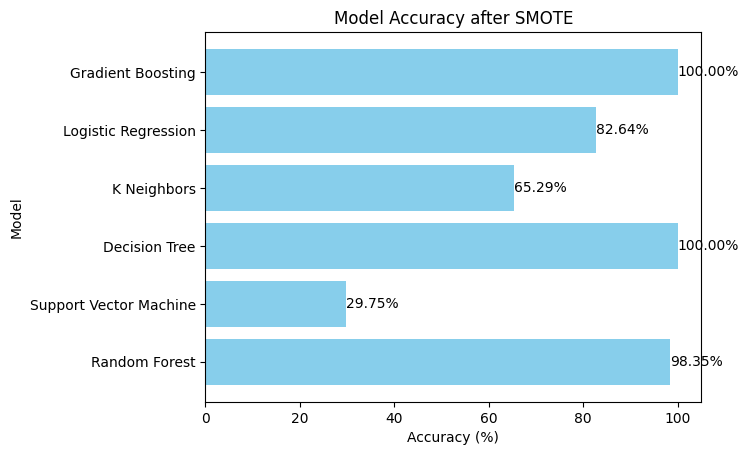

In [63]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Assume X_train, X_test, y_train, y_test are already split from your data
# Before applying SMOTE, check the class distribution
print("Original class distribution:", Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Define models
models = [
    RandomForestClassifier(random_state=42),
    SVC(class_weight='balanced', random_state=42),  # Class weights for SVM
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(class_weight='balanced', random_state=42),  # Class weights for Logistic Regression
    GradientBoostingClassifier(random_state=42)
]

# Names of models
model_names = [
    'Random Forest',
    'Support Vector Machine',
    'Decision Tree',
    'K Neighbors',
    'Logistic Regression',
    'Gradient Boosting'
]

# Evaluate models
def evaluate_models(X_train, y_train, X_test, y_test, models, names):
    accuracies = []

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        accuracies.append(accuracy)
        print(f'{names[index]} accuracy: {round(accuracy, 4)}')
        print(classification_report(y_test, pred))

    # Visualization of accuracies
    acc_df = pd.DataFrame({'Model': names, 'Accuracy': accuracies})

    # Convert accuracy to percentage
    acc_df['Accuracy'] = acc_df['Accuracy'] * 100

    # Create horizontal bar plot
    fig, ax = plt.subplots()
    ax.barh(acc_df['Model'], acc_df['Accuracy'], color='skyblue')

    for index, value in enumerate(acc_df['Accuracy']):
        ax.text(value, index, f'{value:.2f}%', va='center')

    # Set titles and labels
    ax.set_title('Model Accuracy after SMOTE')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Model')

    plt.show()

# Call the function to evaluate models
evaluate_models(X_train_resampled, y_train_resampled, X_test, y_test, models, model_names)


*Cross-Validation*

In [64]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Cross-validation setup (StratifiedKFold to handle imbalanced data better)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply SMOTE for handling imbalance (assuming X_train, y_train are already defined)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = [
    RandomForestClassifier(random_state=42),
    SVC(class_weight='balanced', random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(class_weight='balanced', random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Model names
model_names = [
    'Random Forest',
    'Support Vector Machine',
    'Decision Tree',
    'K Neighbors',
    'Logistic Regression',
    'Gradient Boosting'
]

# Evaluate each model using cross-validation
for index, model in enumerate(models):
    print(f'Evaluating {model_names[index]}...')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

    # Print average accuracy across folds
    print(f'Cross-validation accuracy for {model_names[index]}: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}\n')


Evaluating Random Forest...
Cross-validation accuracy for Random Forest: 0.9987 ± 0.0026

Evaluating Support Vector Machine...
Cross-validation accuracy for Support Vector Machine: 0.3820 ± 0.0377

Evaluating Decision Tree...
Cross-validation accuracy for Decision Tree: 1.0000 ± 0.0000

Evaluating K Neighbors...
Cross-validation accuracy for K Neighbors: 0.7813 ± 0.0164

Evaluating Logistic Regression...
Cross-validation accuracy for Logistic Regression: 0.9051 ± 0.0236

Evaluating Gradient Boosting...
Cross-validation accuracy for Gradient Boosting: 1.0000 ± 0.0000



*Regularization*

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Aggressively regularized Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=300,          # Increase number of trees
    learning_rate=0.001,       # Reduce learning rate further
    max_depth=3,               # Restrict depth of trees
    min_samples_split=15,      # Increase minimum samples to split
    min_samples_leaf=10,       # Increase minimum samples at leaf
    subsample=0.7              # Further reduce the data used in each tree
)

gb_model.fit(X_train, y_train)

# Evaluate the model accuracy
gb_accuracy = gb_model.score(X_test, y_test)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8347


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Aggressively regularize the Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=3,              # Limit the depth of the tree
    min_samples_split=10,     # Minimum samples required to split a node
    min_samples_leaf=5,       # Minimum samples required in a leaf
    max_features='sqrt',      # Consider only a subset of features at each split
    random_state=42
)

# Train and evaluate the model
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Test Accuracy: 0.6033057851239669

Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.88      0.75        56
         1.0       0.54      0.42      0.47        45
         2.0       0.42      0.25      0.31        20

    accuracy                           0.60       121
   macro avg       0.54      0.52      0.51       121
weighted avg       0.58      0.60      0.58       121



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC # Import SVC
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Assuming X_train, y_train are your training data

# Create and train a RandomForestClassifier model
rf_model = RandomForestClassifier()  # You might want to customize hyperparameters
rf_model.fit(X_train, y_train)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train) # Fit the SVM model before predicting

# Create and train the Logistic Regression model
lr_model = LogisticRegression() # Initialize the model
lr_model.fit(X_train, y_train)  # Train the model

# Now you can predict
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Print the accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Random Forest Accuracy: 0.9835
Gradient Boosting Accuracy: 0.8347
Decision Tree Accuracy: 0.6033
SVM Accuracy: 0.4628
Logistic Regression Accuracy: 0.8099


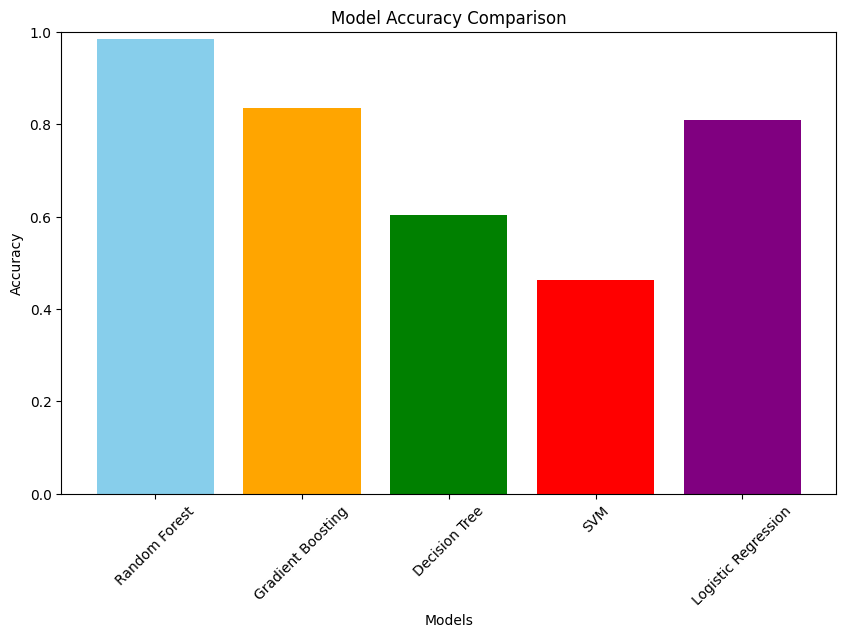

In [68]:
import matplotlib.pyplot as plt

# Define model names and their accuracies
models = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'SVM', 'Logistic Regression']
accuracies = [0.9835, 0.8347, 0.6033, 0.4628, 0.8099]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


#confusion matrix#

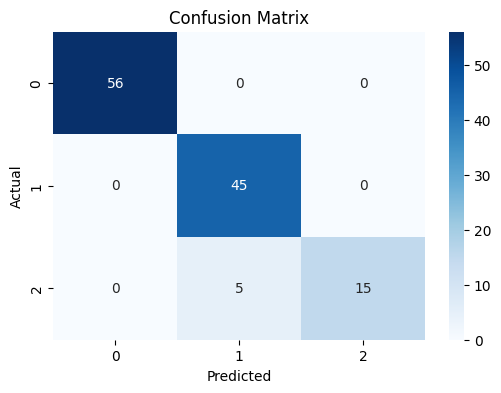

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are your training and testing data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Receiver Operating Characteristic (ROC) Curve#

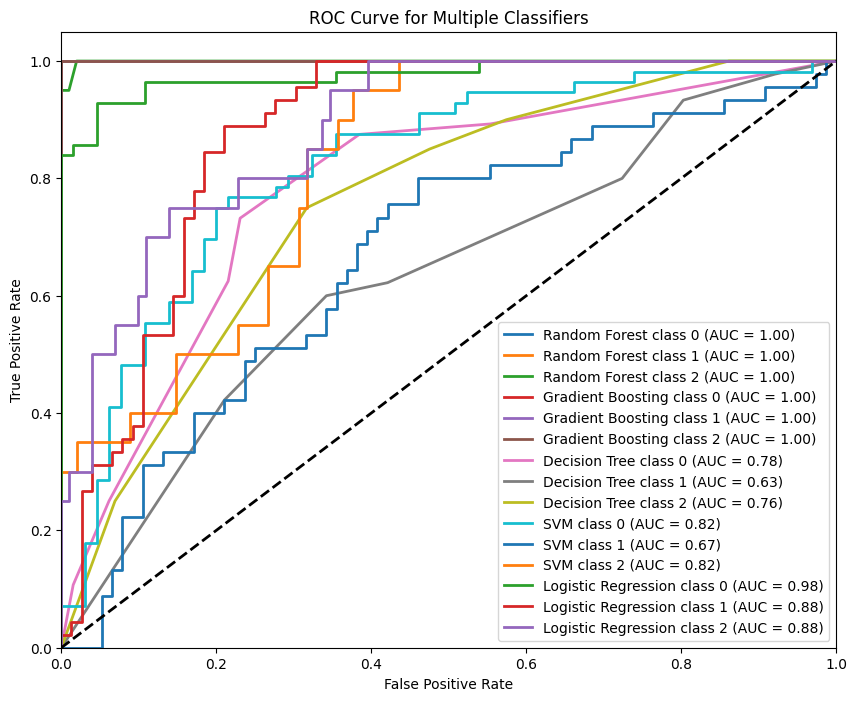

In [77]:
# Create a dictionary of models and names
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model,
    'SVM': svm_model,  # This is where the issue is
    'Logistic Regression': lr_model
}

# Import the auc function (or roc_auc_score)
from sklearn.metrics import auc  # or from sklearn.metrics import roc_auc_score

# Plot ROC curve
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Get prediction probabilities
    # Check if the model has predict_proba, otherwise use decision_function
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
        # For SVM, you might need to scale decision_function output to [0, 1]
        # using a sigmoid function or MinMaxScaler for better ROC curve

    # Plot ROC curve for each class (multi-class)
    for i in range(y_test_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)  # Or roc_auc = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"{model_name} class {i} (AUC = {roc_auc:.2f})")

# Customize the plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()

#Area Under the ROC curve (AUC)#

 quantifies each model's ability to distinguish between the classes. An AUC of 1.0 indicates a perfect classifier, while an AUC of 0.5 suggests performance equivalent to random guessing.

**Model-by-Model and Class-by-Class Analysis:**

1.**Random Forest**

 * Class 0, Class 1, and Class 2: The AUC score is 1.0 across all classes, suggesting that the Random Forest model distinguishes between each class perfectly in the given dataset. This means the model has a 100% probability of correctly ranking a randomly chosen instance from any target class higher than a randomly chosen instance from any other class.

2.**Gradient Boosting**

 * Class 0, Class 1, and Class 2: Similar to Random Forest, the Gradient Boosting model also achieves an AUC of 1.0 for all classes. This demonstrates excellent discriminative power, but similar to Random Forest, such high values may suggest overfitting.

3.**Decision Tree**

 * Class 0: The AUC score is 0.78, indicating that the model distinguishes Class 0 reasonably well from other classes, though not as perfectly as Random Forest or Gradient Boosting.
 * Class 1: The AUC score here is 0.63, which suggests a moderate ability to separate Class 1 instances from other classes. This relatively low score indicates that the Decision Tree model struggles more with distinguishing Class 1 accurately.
 * Class 2: The AUC score is 0.76, meaning the model can identify Class 2 instances with fair accuracy but still performs less effectively than with Class 0.

4.**Support Vector Machine (SVM)**

 * Class 0: AUC of 0.82, showing a good ability to distinguish Class 0 instances.
 * Class 1: AUC of 0.67, indicating some difficulty in accurately identifying Class 1, similar to the Decision Tree model’s performance for this class.
 * Class 2: AUC of 0.82, reflecting a decent performance but slightly lower than other models like Random Forest and Gradient Boosting.

5.**Logistic Regression**

 * Class 0: AUC of 0.98, indicating excellent performance in distinguishing Class 0.
 * Class 1: AUC of 0.88, suggesting good discrimination for Class 1, but not as strong as for Class 0.
 * Class 2: AUC of 0.88, showing a high level of accuracy in separating Class 2 from the other classes.

Overall Interpretation:
Class 0: Most models demonstrate high AUC scores for Class 0, indicating they effectively distinguish instances in this class. If Class 0 is of higher importance in your analysis, these models serve well in correctly identifying instances of this class.
Class 1: Several models, especially Decision Tree and SVM, struggle with Class 1, as reflected by lower AUC scores. This indicates potential challenges in identifying instances of this class accurately, which may warrant further exploration.
Class 2: Generally good AUC scores for Class 2, with Decision Tree performing slightly less effectively. While Gradient Boosting and Random Forest have a perfect AUC for Class 2, it’s essential to ensure these high scores generalize well to unseen data.


#Save model#

In [71]:
from joblib import dump, load

# Save the trained model
dump(rfc, 'random_forest_model.joblib')

# Load the saved model
loaded_rfc = load('random_forest_model.joblib')